In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
header = ("NUM_N", "N", "NUM_BLOCKS", "BLOCK_SIZE", "PROC_MAP", "NUM_PxQ", "P", "Q", "THRESH", "NUM_PFACT", "PFACT", "NUM_REC_STOP_CRIT", "NBMIN", "NUM_REC_PANELS", "NDIV", "NUM_RPFACT", "RPFACT", "NUM_BCAST", "BCAST", "NUM_DEPTH", "DEPTH", "SWAP", "SWAP_THRESH", "L1_T", "U_T", "EQUIL", "MEM_ALIGN", "SLURM_NNODES", "SLURM_NTASKS_PER_NODE", "SLURM_CPUS_PER_TASK", "GFLOPS")

In [15]:
dat_hopper = pd.read_csv('hopper/gcc-11/param_sweep/HPL_global_results.csv', names=header)
dat_hopper['Cluster'] = 'Hopper'

In [16]:
dat_wheeler = pd.read_csv('wheeler/gcc-11/param_sweep/HPL_global_results.csv', names=header)
dat_wheeler['Cluster'] = 'Wheeler'

In [17]:
data = pd.concat((dat_hopper, dat_wheeler))
data

,NUM_N,N,NUM_BLOCKS,BLOCK_SIZE,PROC_MAP,NUM_PxQ,P,Q,THRESH,NUM_PFACT,...,SWAP_THRESH,L1_T,U_T,EQUIL,MEM_ALIGN,SLURM_NNODES,SLURM_NTASKS_PER_NODE,SLURM_CPUS_PER_TASK,GFLOPS,Cluster
0,1,3000,1,128,0,1,1,8,16.0,1,...,64,0,0,1,8,1,8,4,183.24,Hopper
1,1,3000,1,128,0,1,4,2,16.0,1,...,64,0,0,1,8,1,8,4,158.72,Hopper
2,1,3000,1,232,0,1,1,8,16.0,1,...,64,0,0,1,8,1,8,4,147.63,Hopper
3,1,3000,1,128,0,1,2,4,16.0,1,...,64,0,0,1,8,1,8,4,179.89,Hopper
4,1,3000,1,232,0,1,2,4,16.0,1,...,64,0,0,1,8,1,8,4,159.29,Hopper
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1498,1,73080,1,232,0,1,4,12,16.0,1,...,64,0,0,1,8,48,1,8,479.91,Wheeler
1499,1,73080,1,232,0,1,8,6,16.0,1,...,64,0,0,1,8,48,1,8,494.66,Wheeler
1500,1,73080,1,512,0,1,2,24,16.0,1,...,64,0,0,1,8,48,1,8,442.42,Wheeler
1501,1,73080,1,512,0,1,4,12,16.0,1,...,64,0,0,1,8,48,1,8,427.48,Wheeler


In [18]:
data['Process Count'] = data['SLURM_NNODES'] * data['SLURM_NTASKS_PER_NODE'] * data['SLURM_CPUS_PER_TASK']

In [ ]:
data["Q/P"] = data["Q"] / data["P"]

# Plots

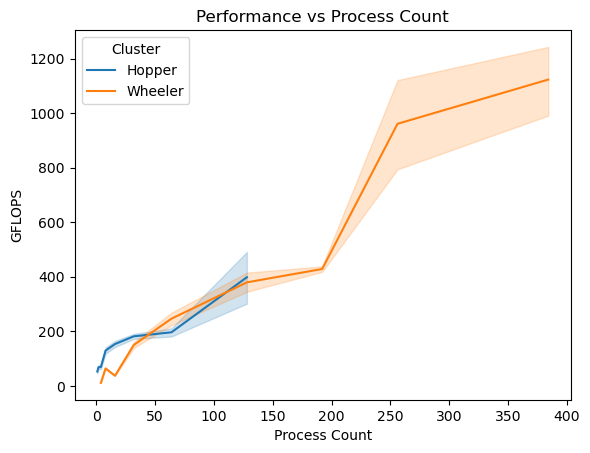

In [26]:
sns.lineplot(data, x="Process Count", y="GFLOPS", hue='Cluster')
plt.title('Performance vs Process Count')
plt.savefig('figures/flops_process_count.svg')

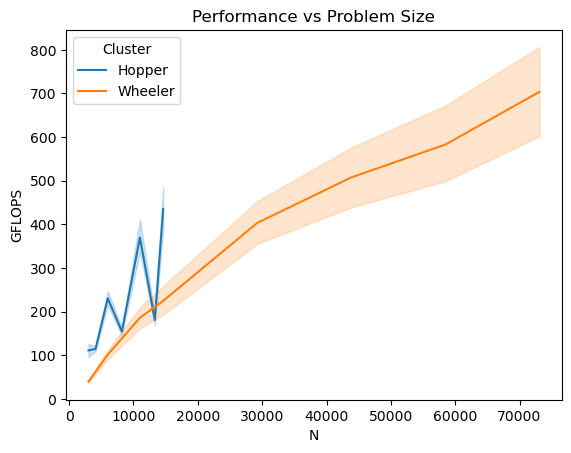

In [27]:
sns.lineplot(data, x="N", y="GFLOPS", hue='Cluster')
plt.title('Performance vs Problem Size')
plt.savefig('figures/flops_problem_size.svg')

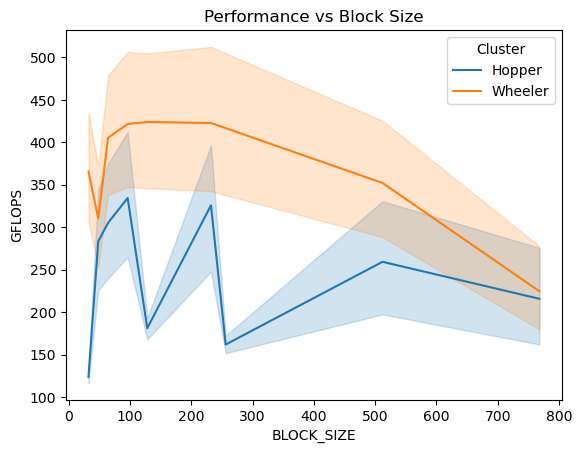

In [28]:
sns.lineplot(data, x="BLOCK_SIZE", y="GFLOPS", hue='Cluster')
plt.title('Performance vs Block Size')
plt.savefig('figures/flops_block_size.svg')

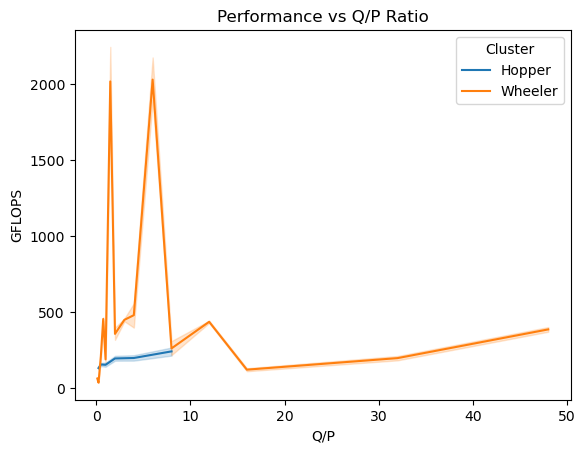

In [32]:
sns.lineplot(data, x="Q/P", y="GFLOPS", hue='Cluster')
plt.title('Performance vs Q/P Ratio')
plt.savefig('figures/flops_q_p.svg')

# Statistics

In [34]:
# Summary Stats for performance of ALL runs
data["GFLOPS"].describe()

count    2784.000000
mean      278.055839
std       393.255700
min         9.360800
25%        76.586750
50%       160.260000
75%       310.285000
max      2996.200000
Name: GFLOPS, dtype: float64